In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Load your dataset
data = pd.read_csv('CORRELATIONS_MAHA_ANURADHAPURA.csv')  # Uncomment and modify to load your dataset

In [45]:
# Check the first few rows of the dataset
print(data.head())

   Year  Maha Total Rainfall  Maha Temp Average  Maha Average Of Max Temp  \
0  1993             1335.731          25.107491                 28.659223   
1  1994              403.595          26.583082                 31.777004   
2  1995              149.891          27.473564                 33.420205   
3  1996              183.517          27.245913                 33.489383   
4  1997              648.767          26.726923                 31.509755   

   Maha Highest Monthly  Average of MaxTemp  Maha Average Of Min Temp  \
0                                 30.420710                 22.484504   
1                                 36.424581                 22.886965   
2                                 37.144677                 23.261741   
3                                 37.456323                 22.698759   
4                                 37.001194                 23.177255   

   Maha Lowest Monthly  Average of Min Temp  Actual Yield (kg/ha)  \
0                            

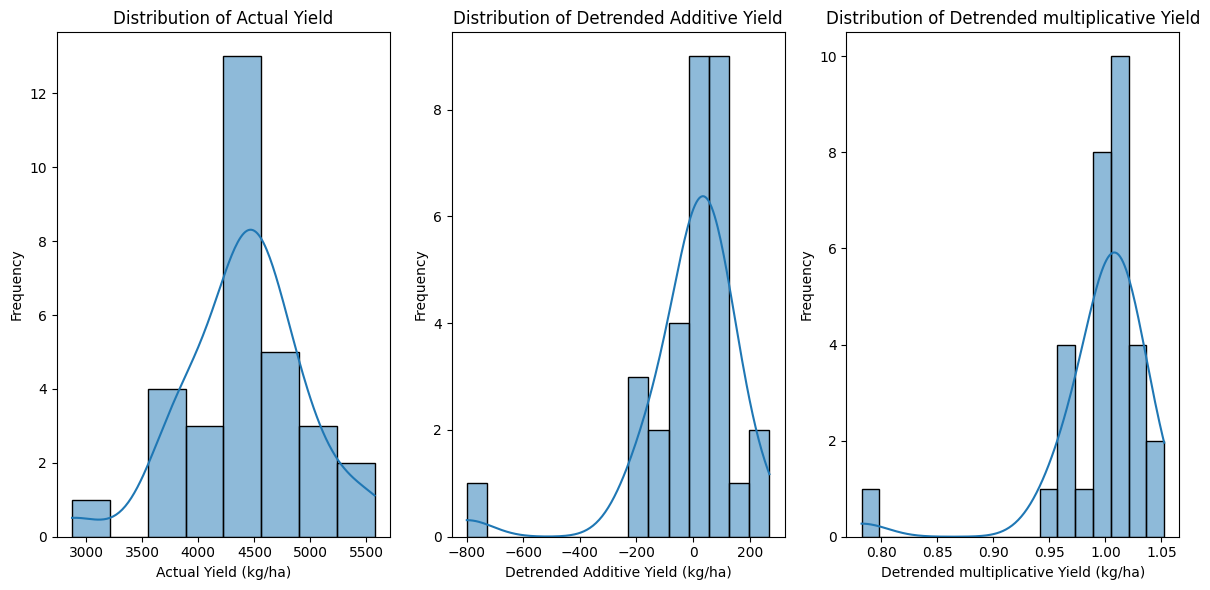

In [46]:
# Distribution plots for Actual Yield and Detrended Yield
plt.figure(figsize=(12, 6))

# Actual Yield Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Actual Yield (kg/ha)'], kde=True)
plt.title('Distribution of Actual Yield')
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Frequency')

# Detrended Additive Yield Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Detrended Additive (kg/ha)'], kde=True)
plt.title('Distribution of Detrended Additive Yield')
plt.xlabel('Detrended Additive Yield (kg/ha)')
plt.ylabel('Frequency')


# Detrended Additive Yield Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Detrended Multiplicative (kg/ha)'], kde=True)
plt.title('Distribution of Detrended multiplicative Yield')
plt.xlabel('Detrended multiplicative Yield (kg/ha)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

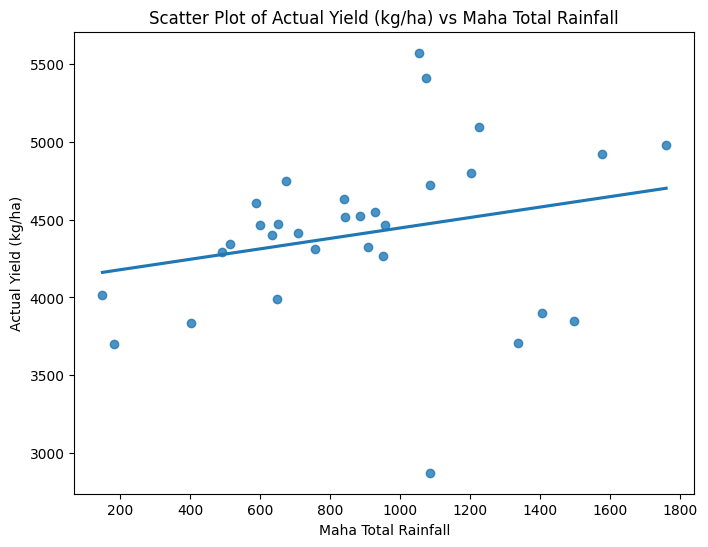

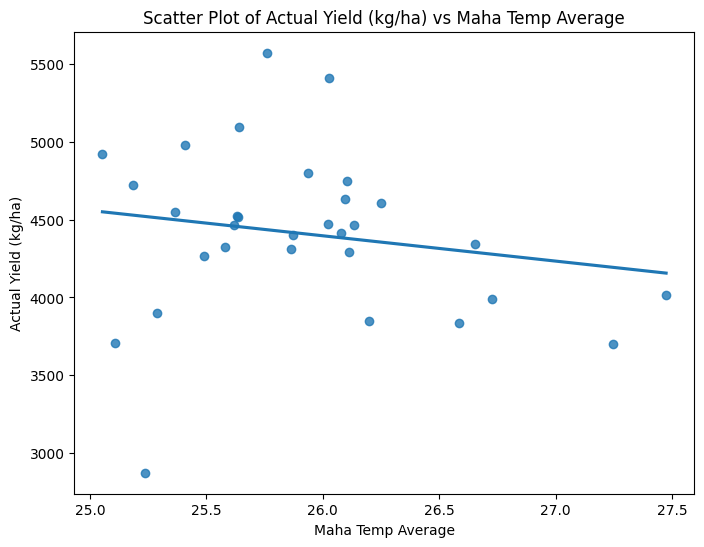

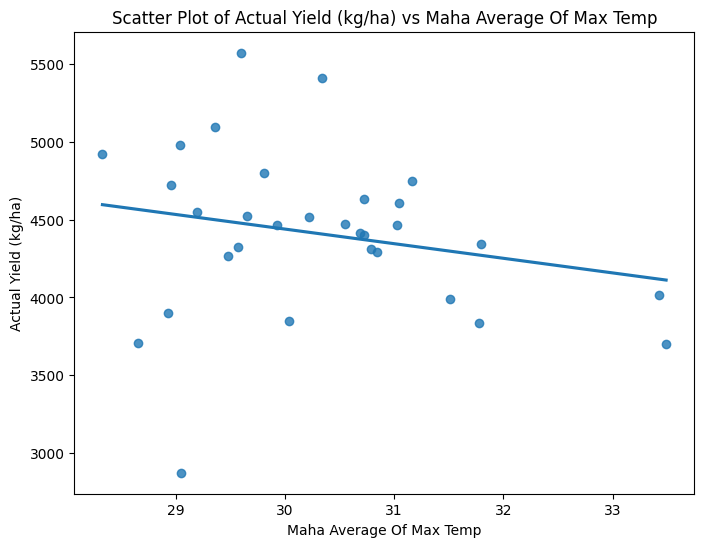

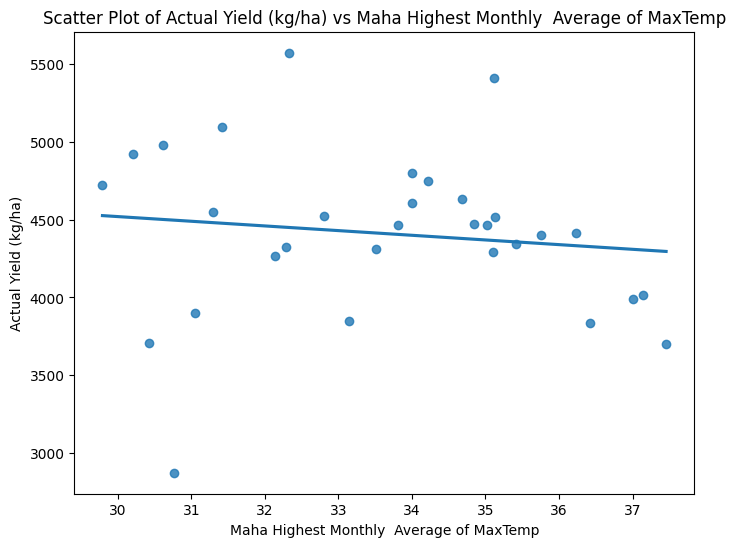

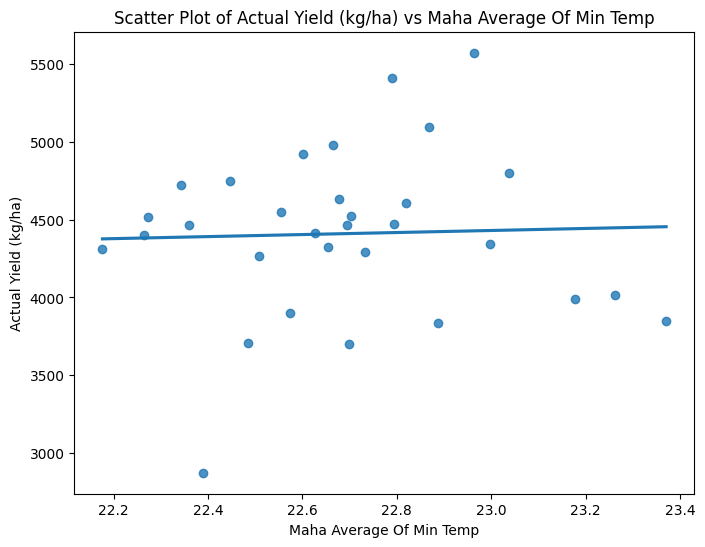

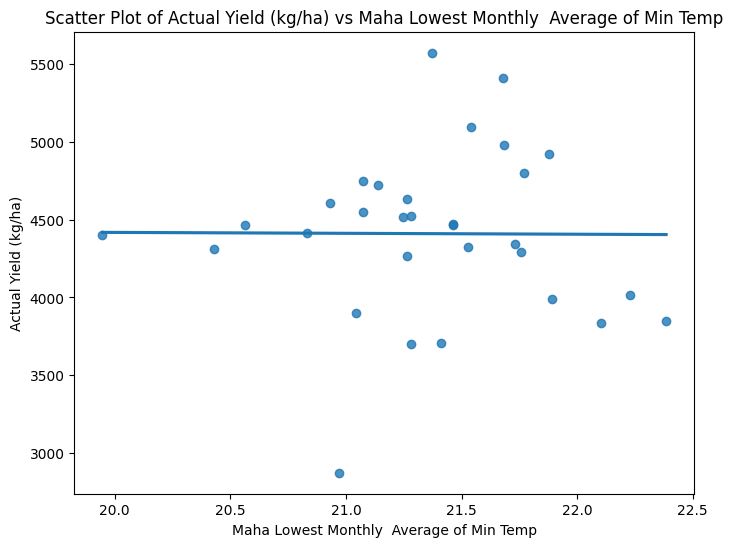

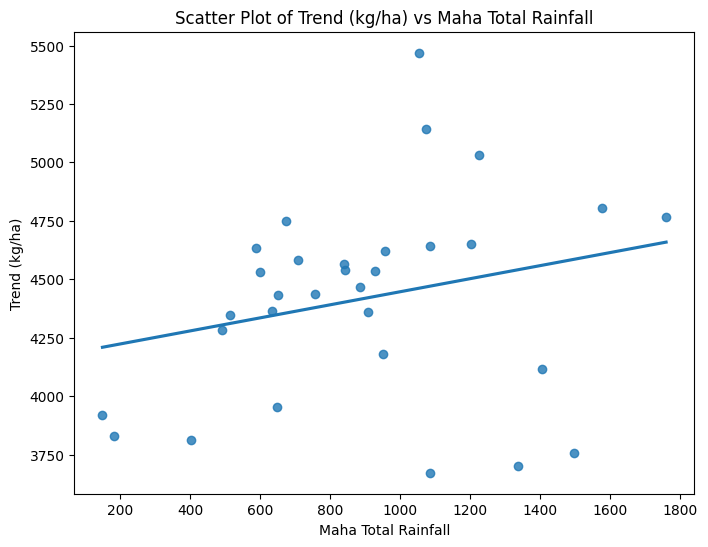

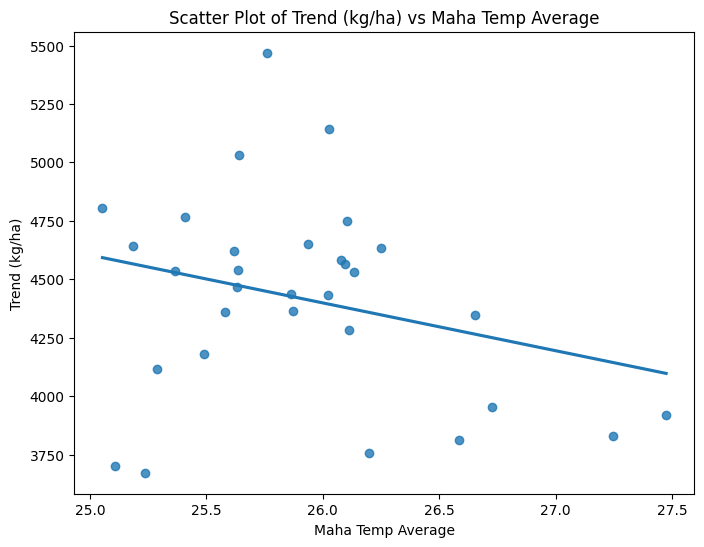

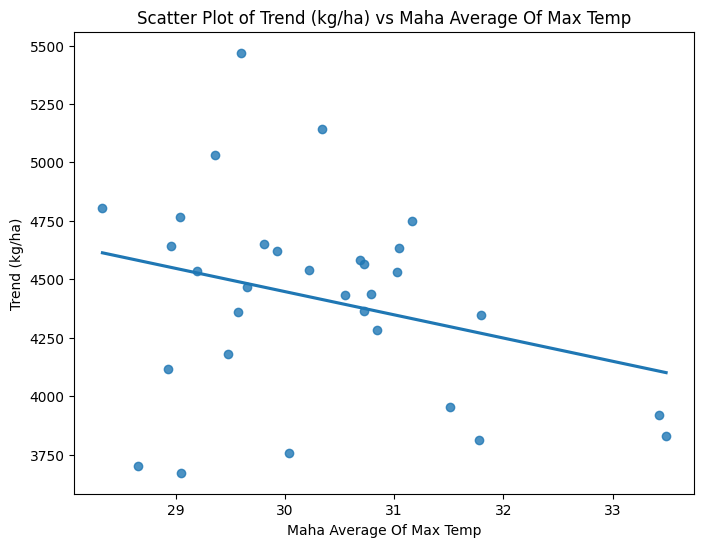

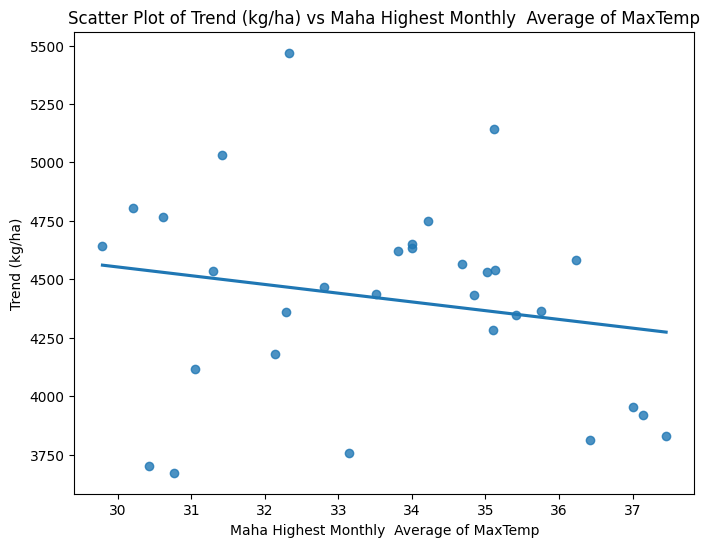

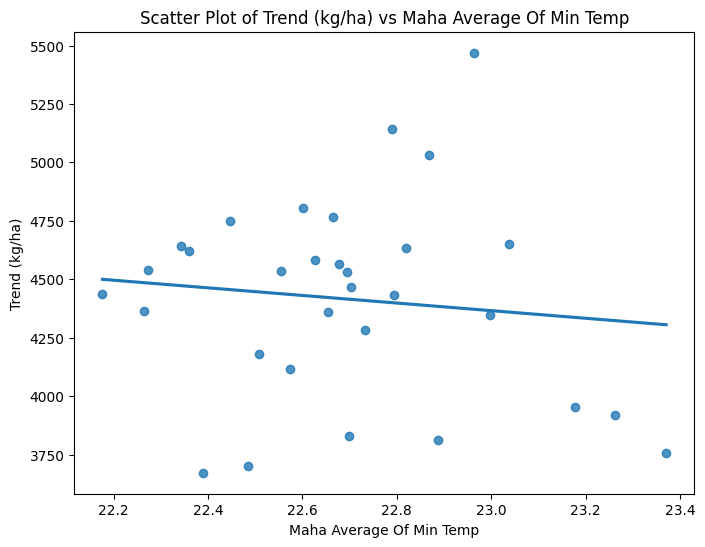

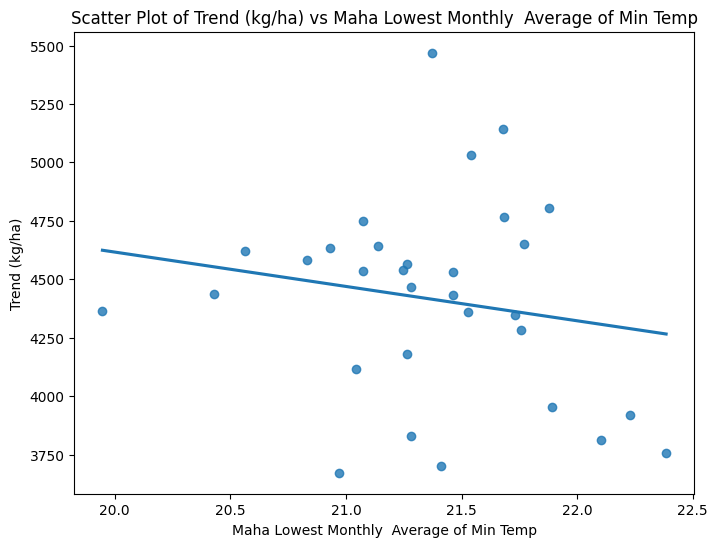

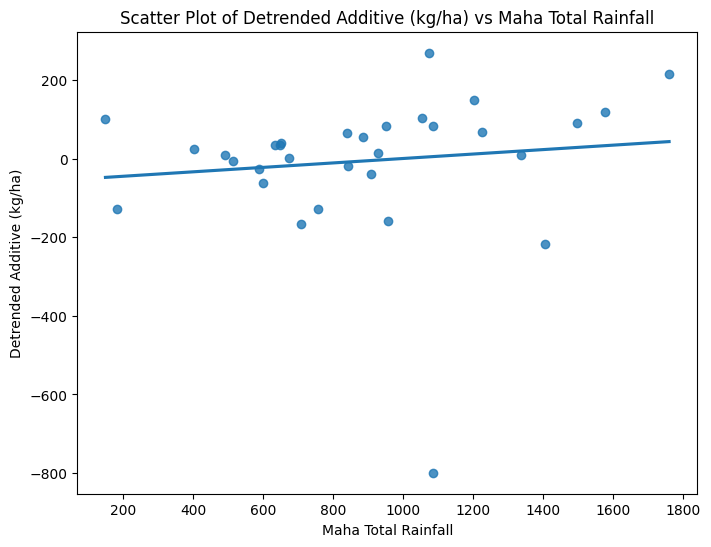

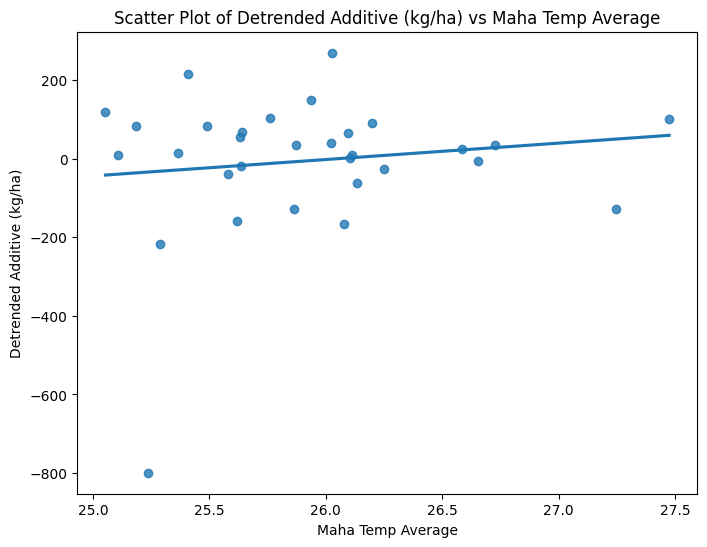

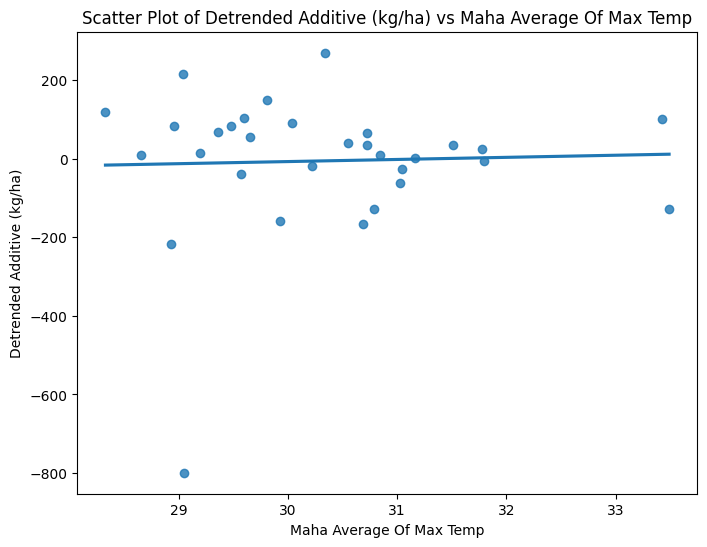

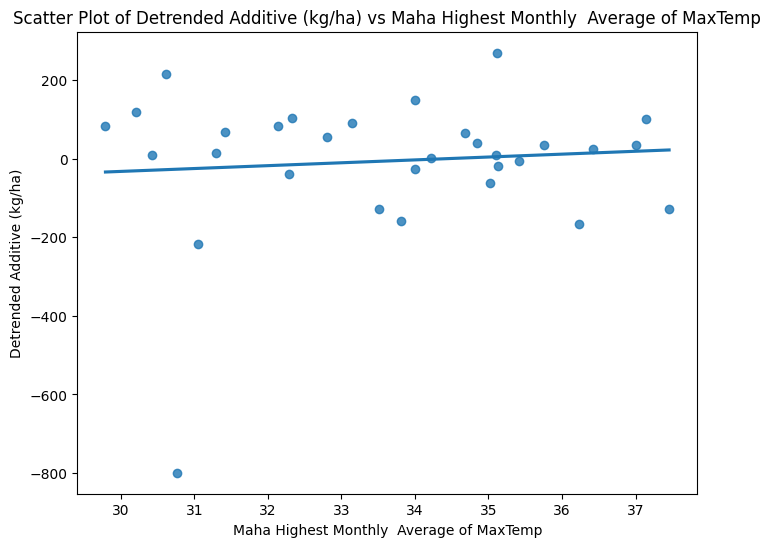

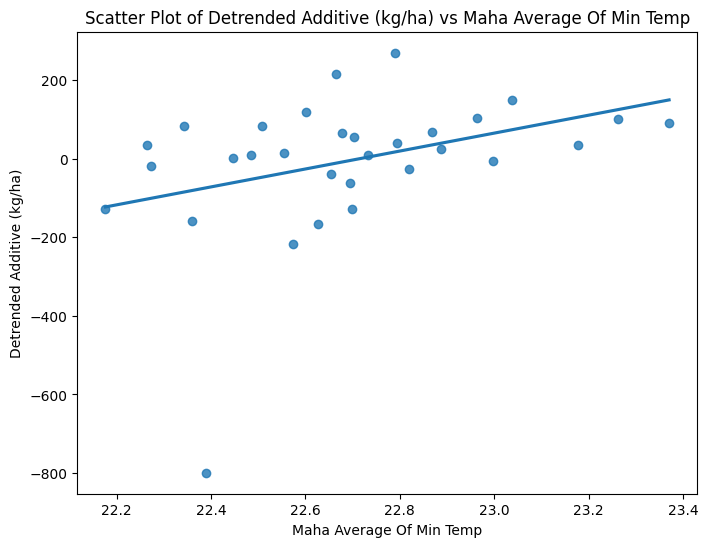

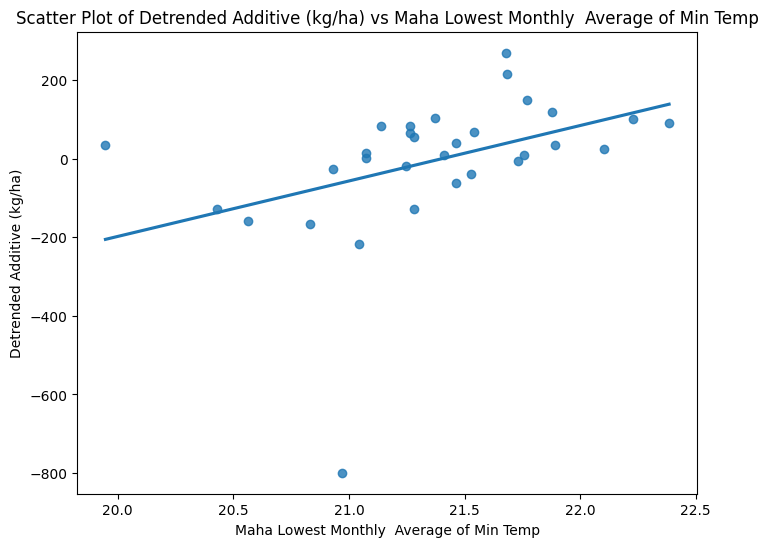

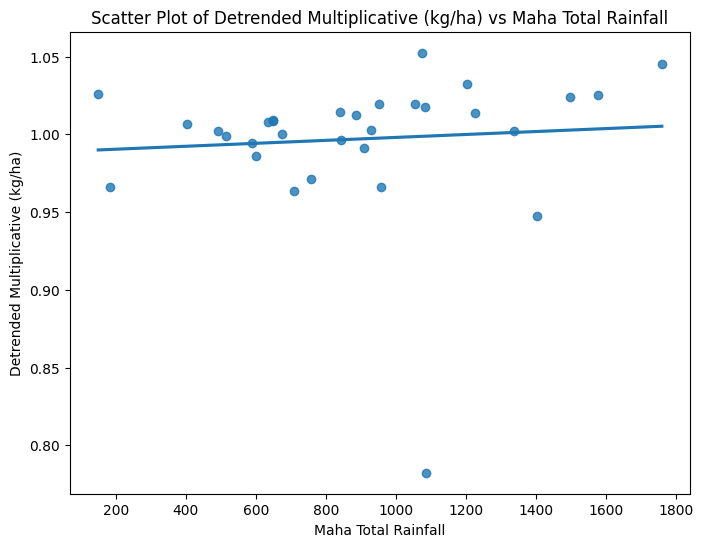

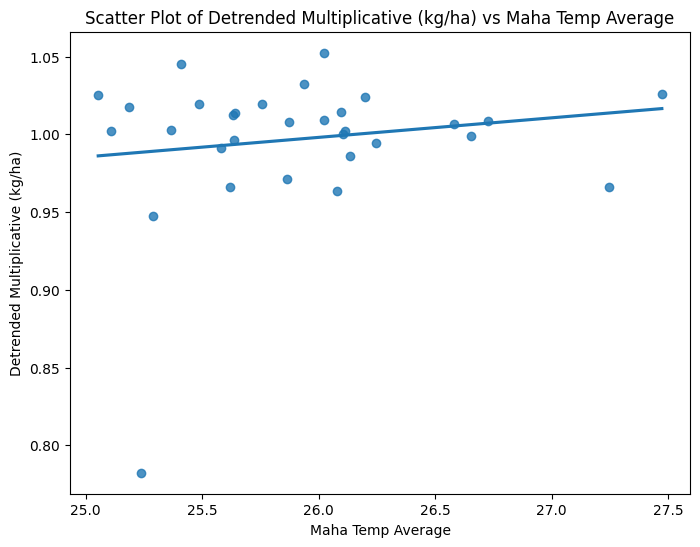

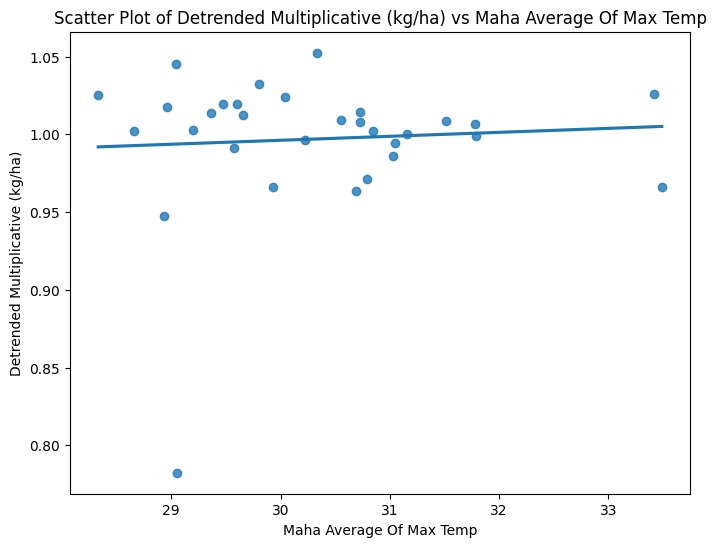

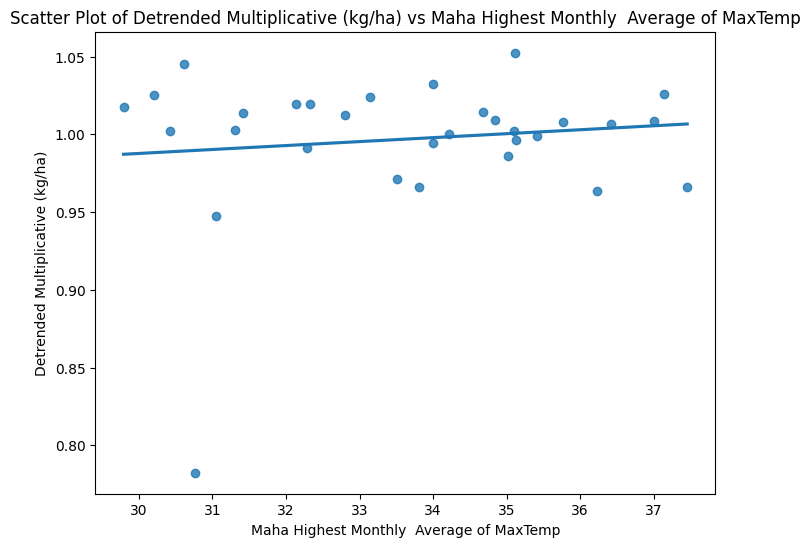

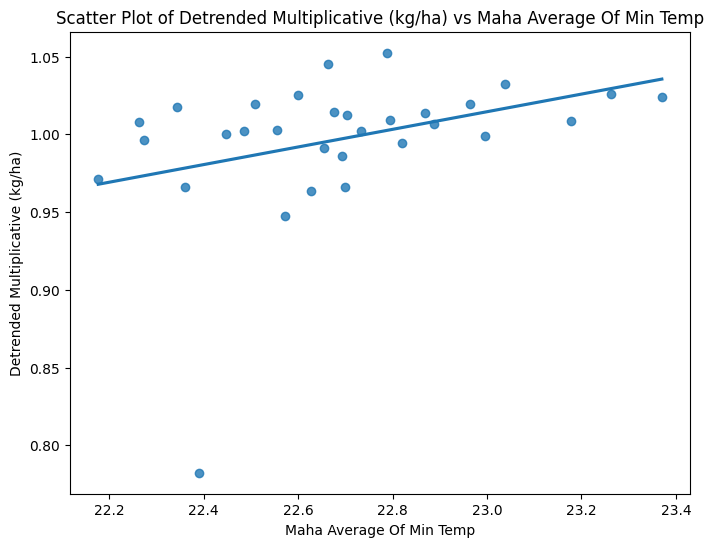

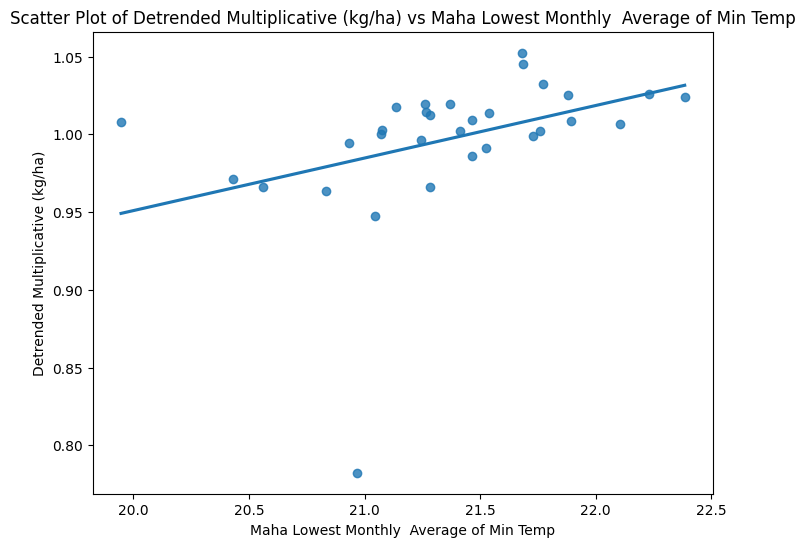

Correlation Matrix:
                                          Maha Total Rainfall  \
Maha Total Rainfall                                  1.000000   
Maha Temp Average                                   -0.768312   
Maha Average Of Max Temp                            -0.868766   
Maha Highest Monthly  Average of MaxTemp            -0.807133   
Maha Average Of Min Temp                            -0.099691   
Maha Lowest Monthly  Average of Min Temp             0.088574   
Actual Yield (kg/ha)                                 0.242076   
Trend (kg/ha)                                        0.250836   
Detrended Additive (kg/ha)                           0.119931   
Detrended Multiplicative (kg/ha)                     0.078997   

                                          Maha Temp Average  \
Maha Total Rainfall                               -0.768312   
Maha Temp Average                                  1.000000   
Maha Average Of Max Temp                           0.965750   
Maha Highest

In [47]:
# Correlation analysis
weather_columns = ['Maha Total Rainfall', 'Maha Temp Average', 'Maha Average Of Max Temp', 'Maha Highest Monthly  Average of MaxTemp','Maha Average Of Min Temp','Maha Lowest Monthly  Average of Min Temp']
yield_columns = ['Actual Yield (kg/ha)',
                 'Trend (kg/ha)',
                 'Detrended Additive (kg/ha)',
                 'Detrended Multiplicative (kg/ha)']

for yield_col in yield_columns:
    for weather_col in weather_columns:
        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(x=data[weather_col], y=data[yield_col], ci=None)
        plt.title(f'Scatter Plot of {yield_col} vs {weather_col}')
        plt.xlabel(weather_col)
        plt.ylabel(yield_col)

        plt.show()

# Optional: Display correlation matrix
correlation_matrix = data[weather_columns + yield_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

In [48]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Replace 'AverageYieldKgPERha' with the correct column name from your dataset
    # Assuming the correct column name is 'Actual Yield (kg/ha)' based on your previous code

    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    valid_data = data[[var, 'Actual Yield (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Actual Yield (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Maha Total Rainfall
  Pearson Correlation Coefficient (r): 0.24
  P-value: 0.1895
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Temp Average
  Pearson Correlation Coefficient (r): -0.18
  P-value: 0.3386
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.22
  P-value: 0.2359
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Highest Monthly  Average of MaxTemp
  Pearson Correlation Coefficient (r): -0.13
  P-value: 0.5006
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Min Temp
  Pearson Correlation Coefficient (r): 0.04
  P-value: 0.8489
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.01
  P-value: 0.9758
  The correlation is not statistically significant (p >= 0.05).



In [49]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation
for var in weather_columns:
    # Drop rows with NaN or inf in the relevant columns before calculating correlation
    # Include 'Trend (kg/ha)' in the columns used to create valid_data
    valid_data = data[[var, 'Actual Yield (kg/ha)', 'Trend (kg/ha)']].dropna().replace([np.inf, -np.inf], np.nan).dropna()

    correlation_coefficient, p_value = pearsonr(valid_data['Trend (kg/ha)'], valid_data[var])
    print(f"Variable: {var}")
    print(f"  Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")
    print(f"  P-value: {p_value:.4f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"  The correlation is statistically significant (p < {alpha}).")
        if correlation_coefficient > 0:
            print("  Positive linear relationship.")
        else:
            print("  Negative linear relationship.")
    else:
        print(f"  The correlation is not statistically significant (p >= {alpha}).")
    print()

Variable: Maha Total Rainfall
  Pearson Correlation Coefficient (r): 0.25
  P-value: 0.1735
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Temp Average
  Pearson Correlation Coefficient (r): -0.28
  P-value: 0.1295
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Max Temp
  Pearson Correlation Coefficient (r): -0.29
  P-value: 0.1150
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Highest Monthly  Average of MaxTemp
  Pearson Correlation Coefficient (r): -0.19
  P-value: 0.2938
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Average Of Min Temp
  Pearson Correlation Coefficient (r): -0.11
  P-value: 0.5542
  The correlation is not statistically significant (p >= 0.05).

Variable: Maha Lowest Monthly  Average of Min Temp
  Pearson Correlation Coefficient (r): -0.18
  P-value: 0.3373
  The correlation is not statistically significant (p >= 0.05).

